In [3]:
## Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [5]:
## Paso 2: Cargar y preparar el dataset
df = pd.read_csv("C:/Proyecto_Final/DataSetFinal.csv")
df.columns = df.columns.str.replace(' ', '_')  # Limpiar nombres de columnas

# Variables predictoras y variable objetivo
X = df[['Wind_Speed_(m/s)', 'Theoretical_Power_Curve_(kW)']]
y = df['LV_ActivePower_(kW)']

In [7]:
## Paso 3: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
## Paso 4: Crear y entrenar el modelo LightGBM
lgb_model = LGBMRegressor(
    objective='regression',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    n_estimators=100
)

lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 40424, number of used features: 2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Start training from score 1311.361866


LGBMRegressor(feature_fraction=0.9, learning_rate=0.05, objective='regression')

In [13]:
## Paso 5: Realizar predicciones
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [15]:
## Paso 6: Evaluar el modelo
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"MAE: {mae_lgb:.2f}")
print(f"MSE: {mse_lgb:.2f}")
print(f"RMSE: {rmse_lgb:.2f}")
print(f"R2: {r2_lgb:.2f}")

MAE: 166.33
MSE: 159868.89
RMSE: 399.84
R2: 0.91


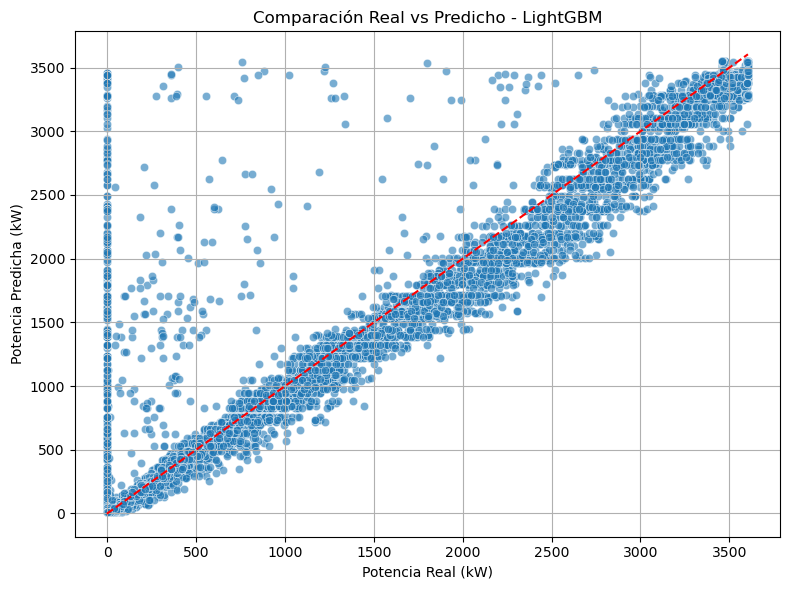

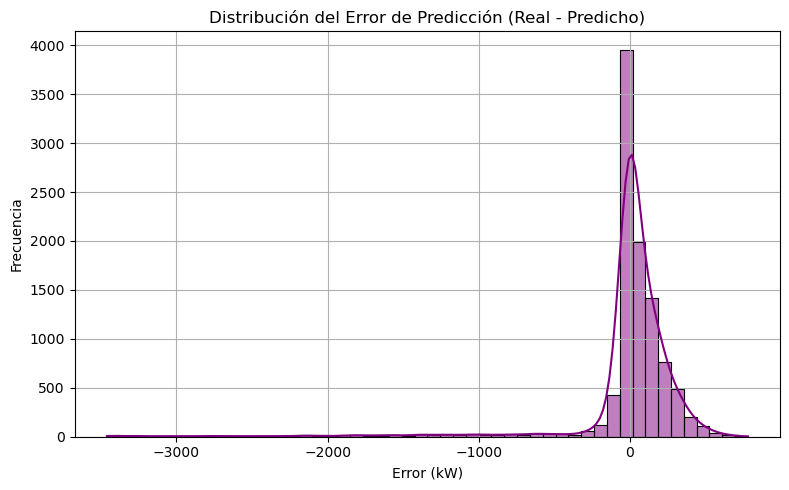

In [17]:
## Paso 7: Visualizaciones
# Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Potencia Real (kW)')
plt.ylabel('Potencia Predicha (kW)')
plt.title('Comparación Real vs Predicho - LightGBM')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribución del Error
errores = y_test - y_pred_lgb
plt.figure(figsize=(8, 5))
sns.histplot(errores, bins=50, kde=True, color='purple')
plt.title('Distribución del Error de Predicción (Real - Predicho)')
plt.xlabel('Error (kW)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
## Paso 8: Guardar el modelo entrenado
joblib.dump(lgb_model, 'C:/Proyecto_Final/modelo_LightGBM.pkl')

['C:/Proyecto_Final/modelo_LightGBM.pkl']